In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Desktop/Liver Data.csv')
df

Age of the patient Gender of the patient  Total Bilirubin  \
0                    65.0                Female              0.7   
1                    62.0                  Male             10.9   
2                    62.0                  Male              7.3   
3                    58.0                  Male              1.0   
4                    72.0                  Male              3.9   
...                   ...                   ...              ...   
30686                50.0                  Male              2.2   
30687                55.0                  Male              2.9   
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0                   0.1                          187.0   
1                   5.5                          699.0   
2                   4.1                          490.0   
3                   0.4                          182.0   
4                   2.0                          195.0   
...                 ...                            ...   
30686               1.0                          610.0   
30687               1.3                          482.0   
30688               3.0                          542.0   
30689               1.0                          231.0   
30690               1.6                          253.0   

        Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                                16.0                             18.0   
1                                64.0                            100.0   
2                                60.0                             68.0   
3                                14.0                             20.0   
4                                27.0                             59.0   
...                               ...                              ...   
30686                            17.0                             28.0   
30687                            22.0                             34.0   
30688                           116.0                             66.0   
30689                            16.0                             55.0   
30690                            80.0                            406.0   

       Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  \
0                 6.8           3.3                                  0.90   
1                 7.5           3.2                                  0.74   
2                 7.0           3.3                                  0.89   
3                 6.8           3.4                                  1.00   
4                 7.3           2.4                                  0.40   
...               ...           ...                                   ...   
30686             7.3           2.6                                  0.55   
30687             7.0           2.4                                  0.50   
30688             6.4           3.1                                  0.90   
30689             4.3           1.6                                  0.60   
30690             6.8           3.9                                  1.30   

       Result  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
30686       1  
30687       1  
30688       1  
30689       1  
30690       1  

[30691 rows x 11 columns]

In [4]:
# Data Exploration
# 1. Dimension of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (30691, 11)


In [5]:
# 2. Summary of the dataset
print("\nSummary of the dataset:\n")
print(df.info())


Summary of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  in

In [6]:
print("\nDescriptive statistics:\n")
print(df.describe(include='all'))


Descriptive statistics:

        Age of the patient Gender of the patient  Total Bilirubin  \
count         30689.000000                 29789     30043.000000   
unique                 NaN                     2              NaN   
top                    NaN                  Male              NaN   
freq                   NaN                 21986              NaN   
mean             44.107205                   NaN         3.370319   
std              15.981043                   NaN         6.255522   
min               4.000000                   NaN         0.400000   
25%              32.000000                   NaN         0.800000   
50%              45.000000                   NaN         1.000000   
75%              55.000000                   NaN         2.700000   
max              90.000000                   NaN        75.000000   

        Direct Bilirubin   Alkphos Alkaline Phosphotase  \
count       30130.000000                   29895.000000   
unique               NaN   

In [7]:
# 3. Checking for missing values
print("\nMissing values:\n")
print(df.isnull().sum())


Missing values:

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [8]:
# 4. Checking for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 11323


In [9]:
# Data Cleaning
# Dropping duplicates
df = df.drop_duplicates()

In [10]:
# Handling missing values (using mean for numerical and mode for categorical columns)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Verifying if missing values are handled
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())


Missing values after cleaning:

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2549647058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2549647058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)


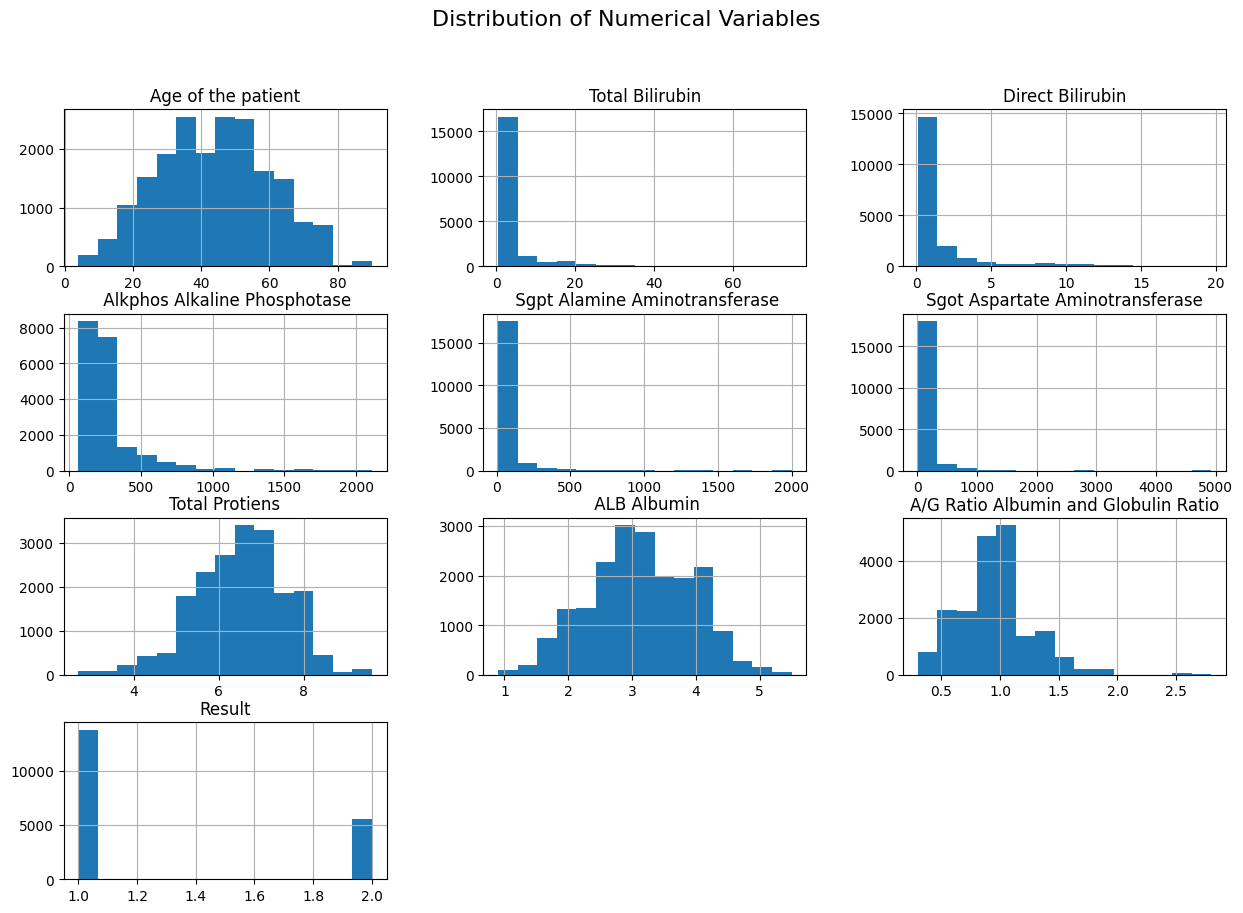

In [11]:
# Univariate Analysis
# Distribution of numerical variables
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

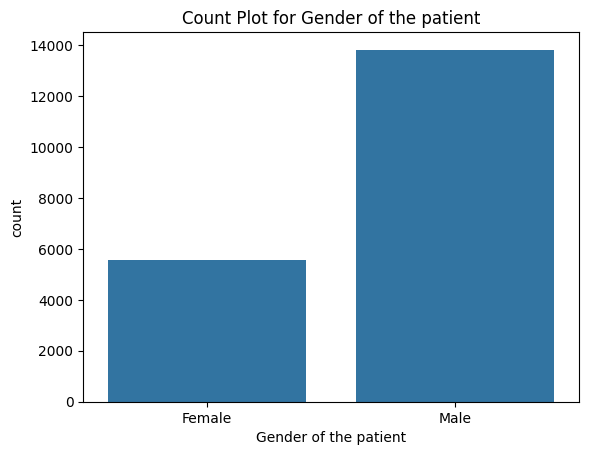

In [12]:
# Count plot for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.show()

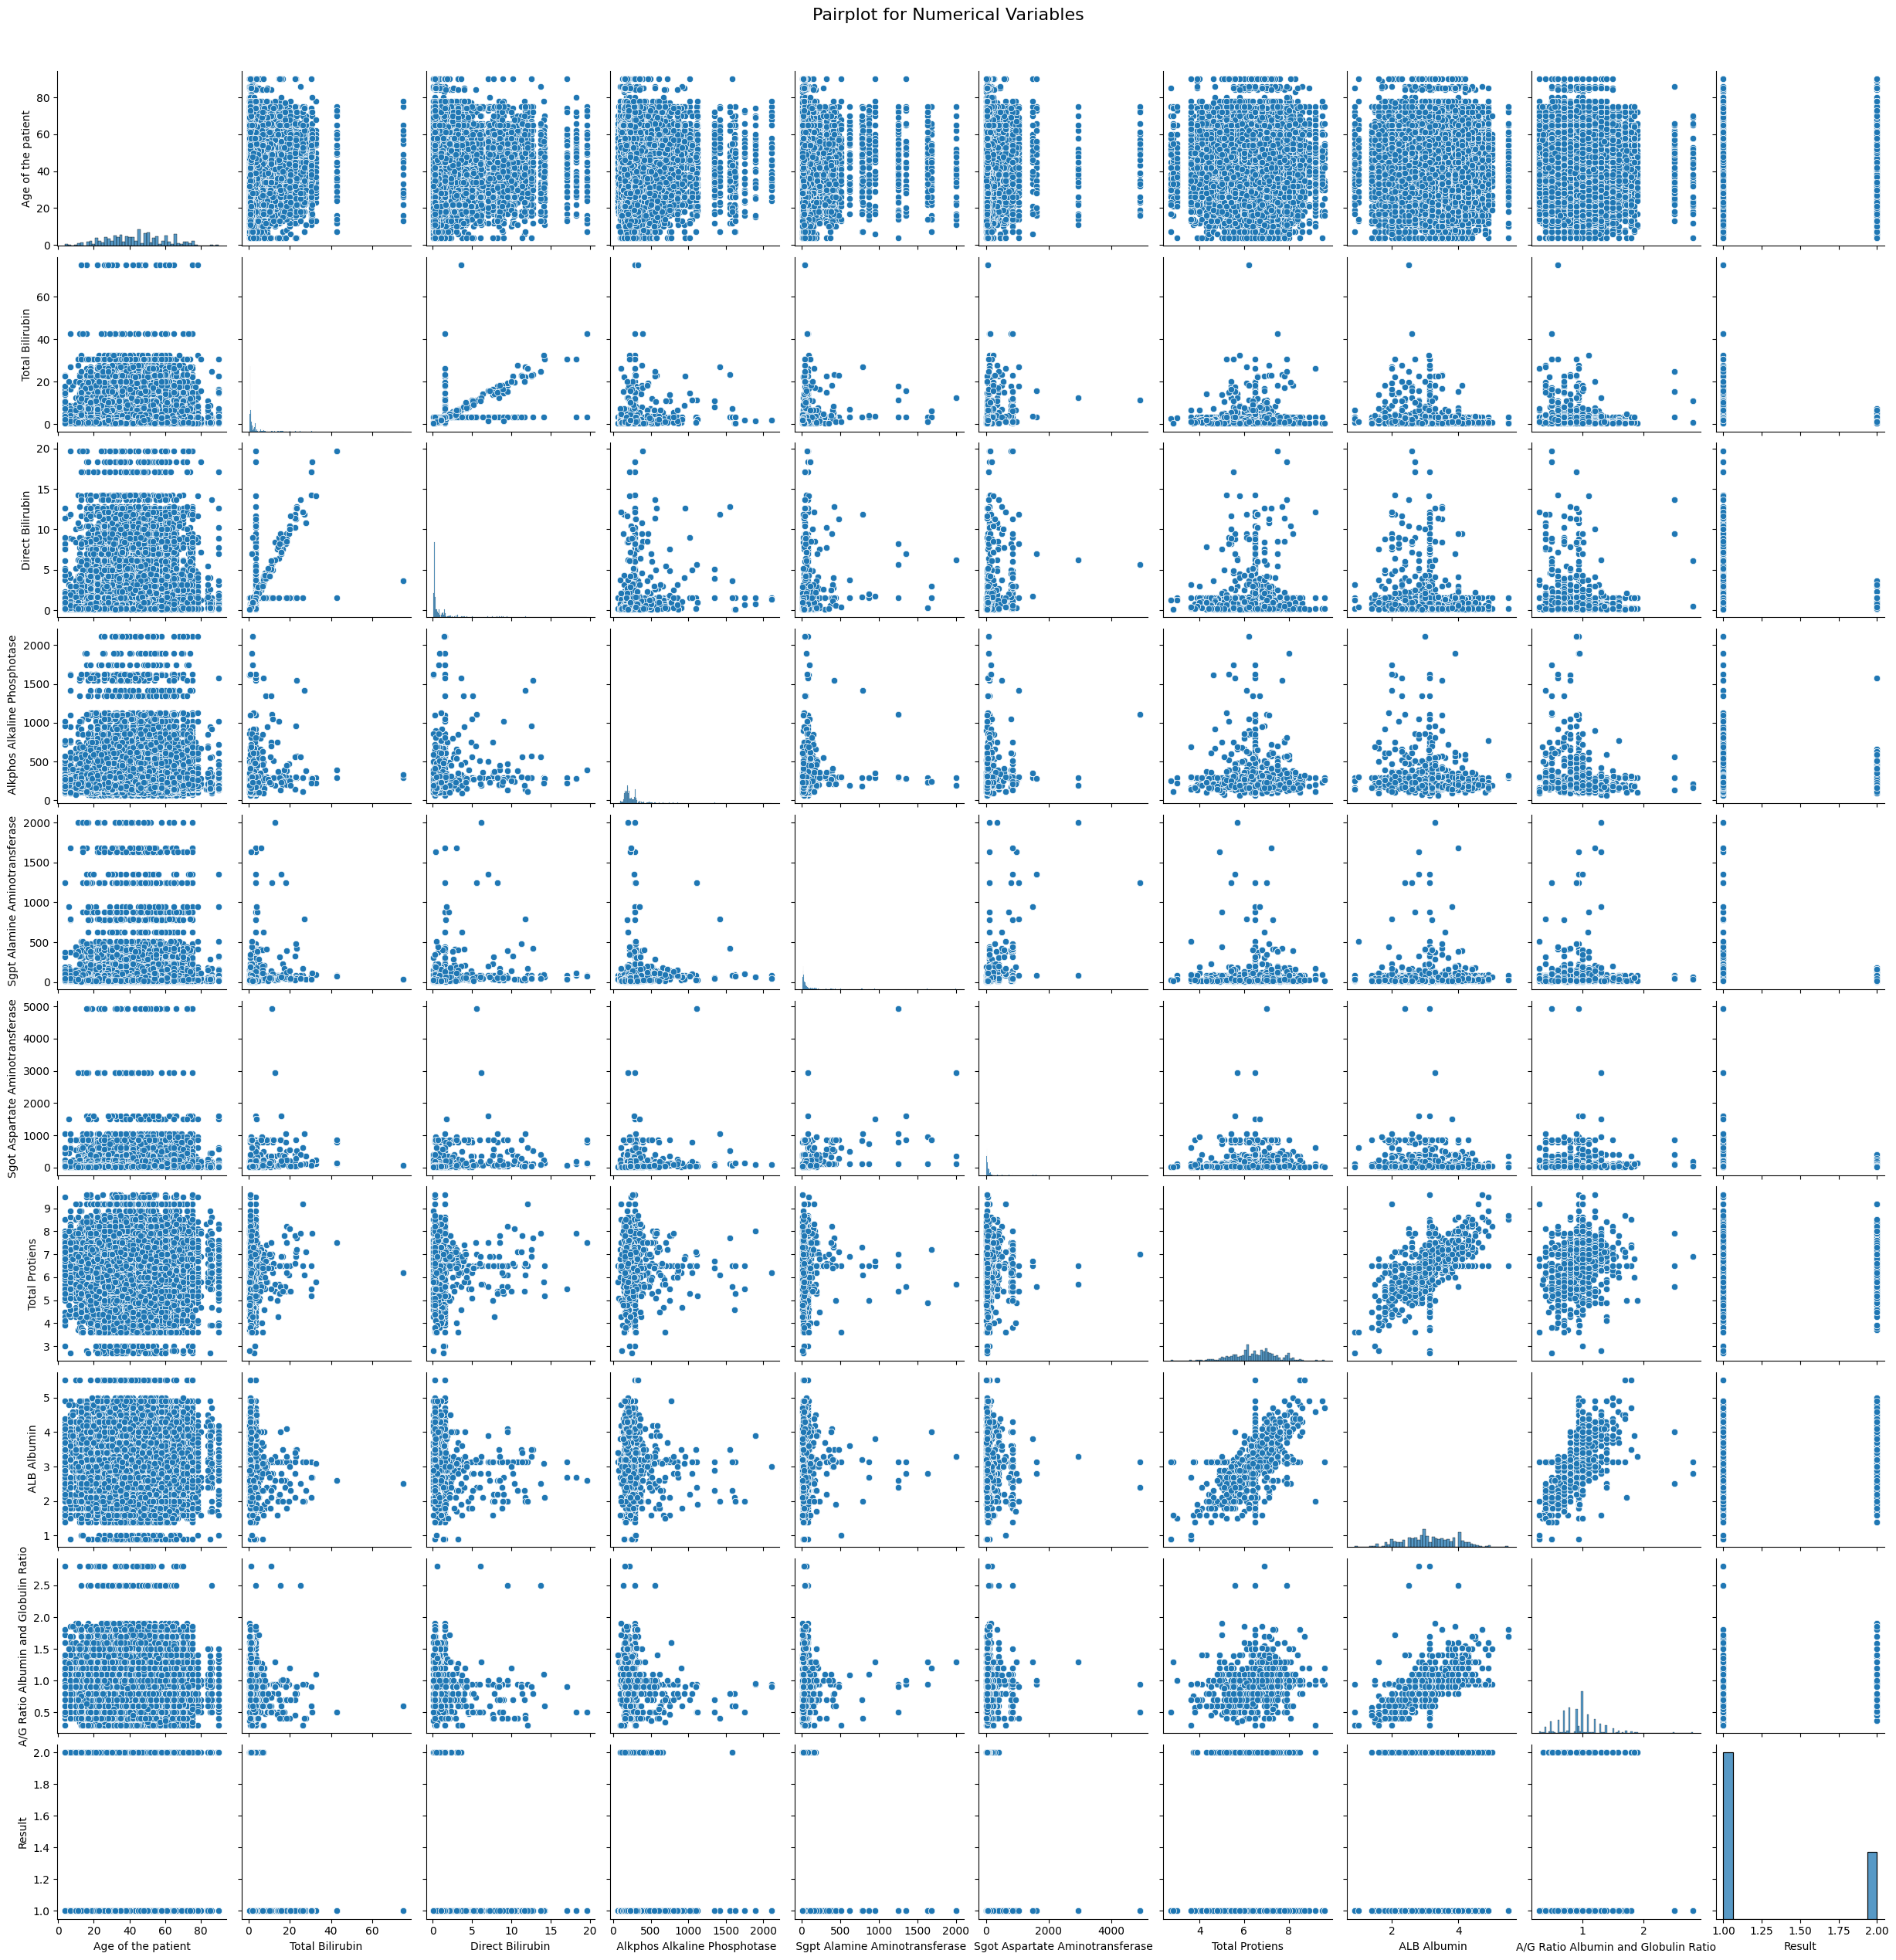

In [13]:
# Bivariate Analysis
# Pairplot for numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot for Numerical Variables", y=1.02, fontsize=16)
plt.show()

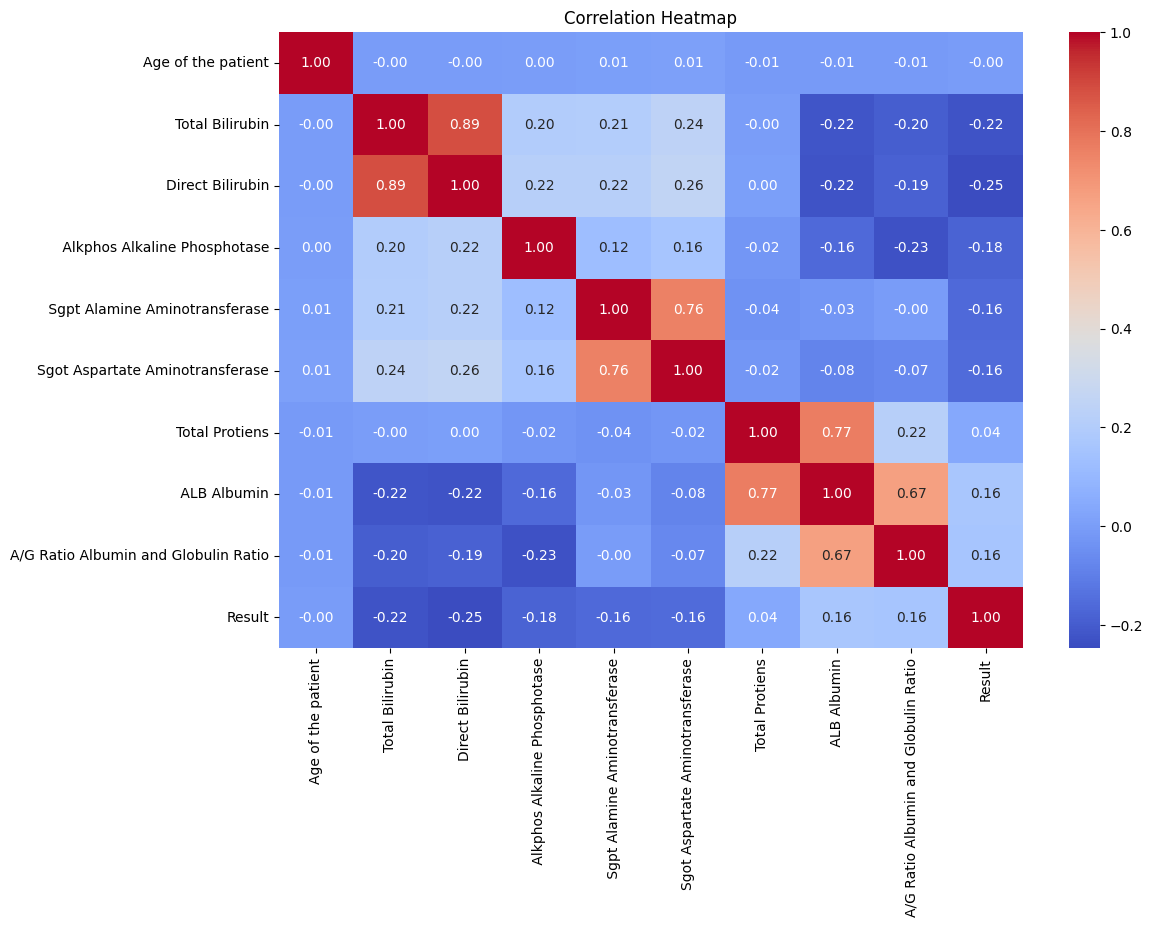

In [18]:
# Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

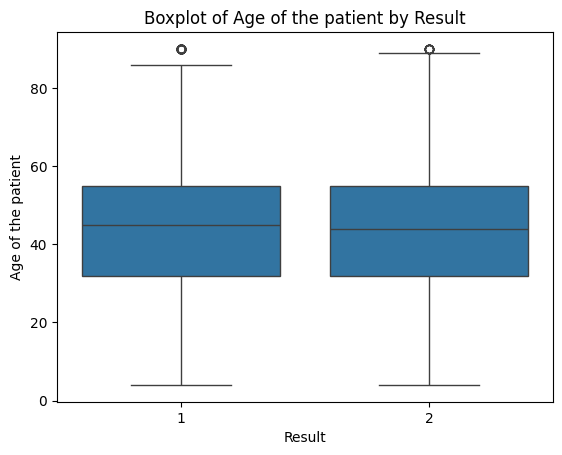

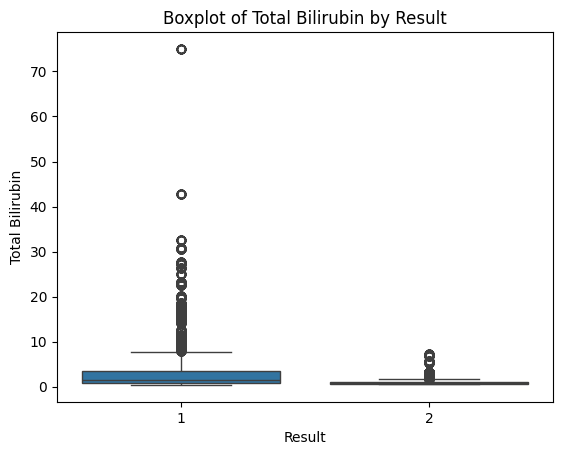

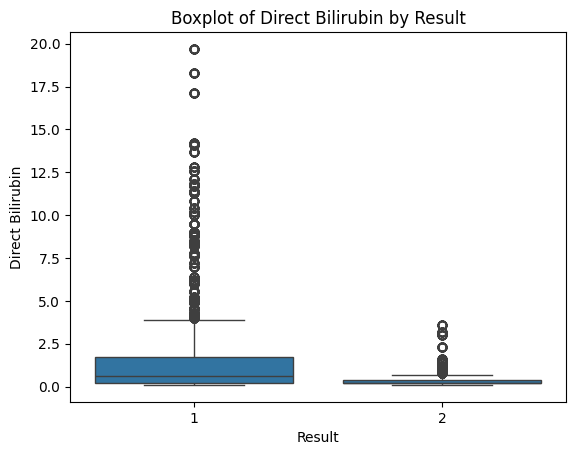

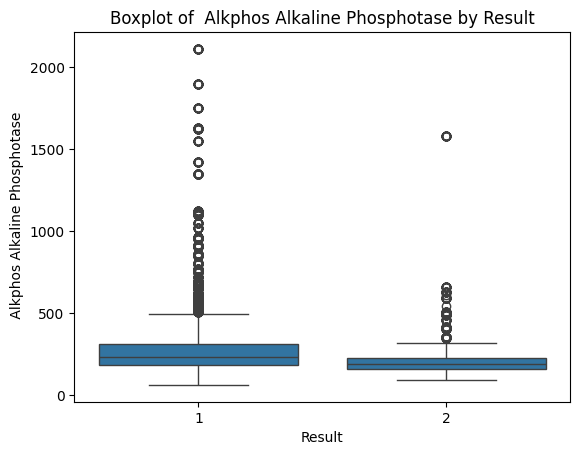

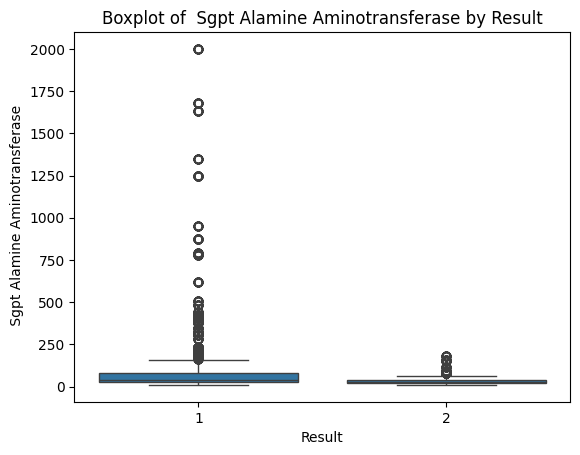

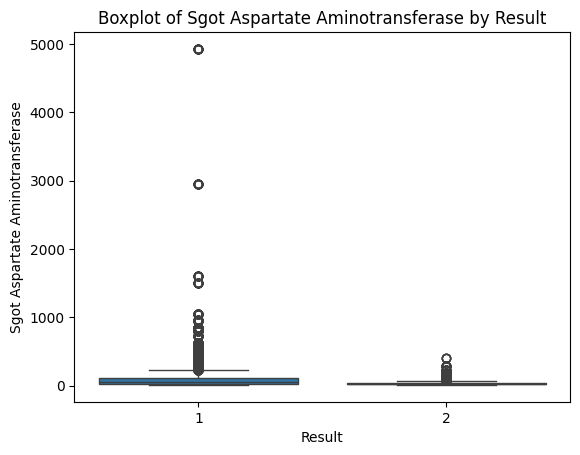

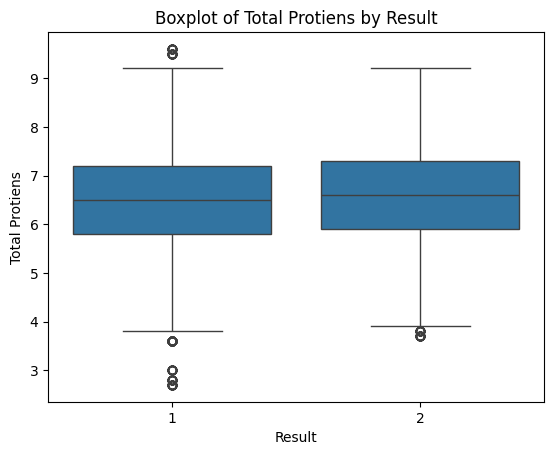

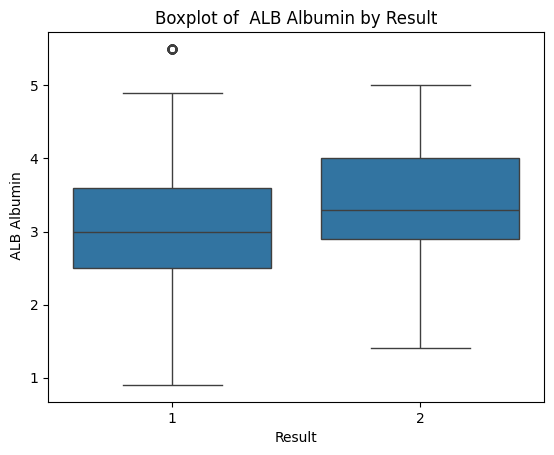

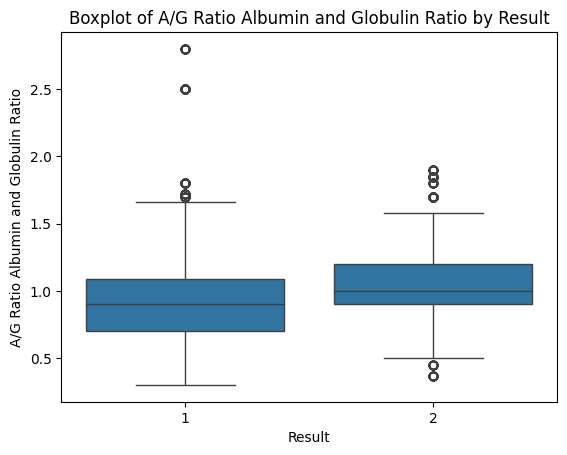

In [19]:
# Boxplots for numerical variables grouped by a categorical variable (e.g., Result)
for col in numerical_cols:
    if col != 'Result':
        sns.boxplot(x='Result', y=col, data=df)
        plt.title(f"Boxplot of {col} by Result")
        plt.show()

In [21]:
# Multivariate Analysis
# 1. Feature importance using correlation with the target variable
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if 'Result' in df.columns:
    correlation_with_target = numeric_df.corr()['Result'].sort_values(ascending=False)
    print("\nCorrelation of features with target variable (Result):\n", correlation_with_target)


Correlation of features with target variable (Result):
 Result                                  1.000000
 ALB Albumin                            0.164179
A/G Ratio Albumin and Globulin Ratio    0.160702
Total Protiens                          0.036845
Age of the patient                     -0.003178
Sgot Aspartate Aminotransferase        -0.157203
 Sgpt Alamine Aminotransferase         -0.161626
 Alkphos Alkaline Phosphotase          -0.179828
Total Bilirubin                        -0.224042
Direct Bilirubin                       -0.246515
Name: Result, dtype: float64


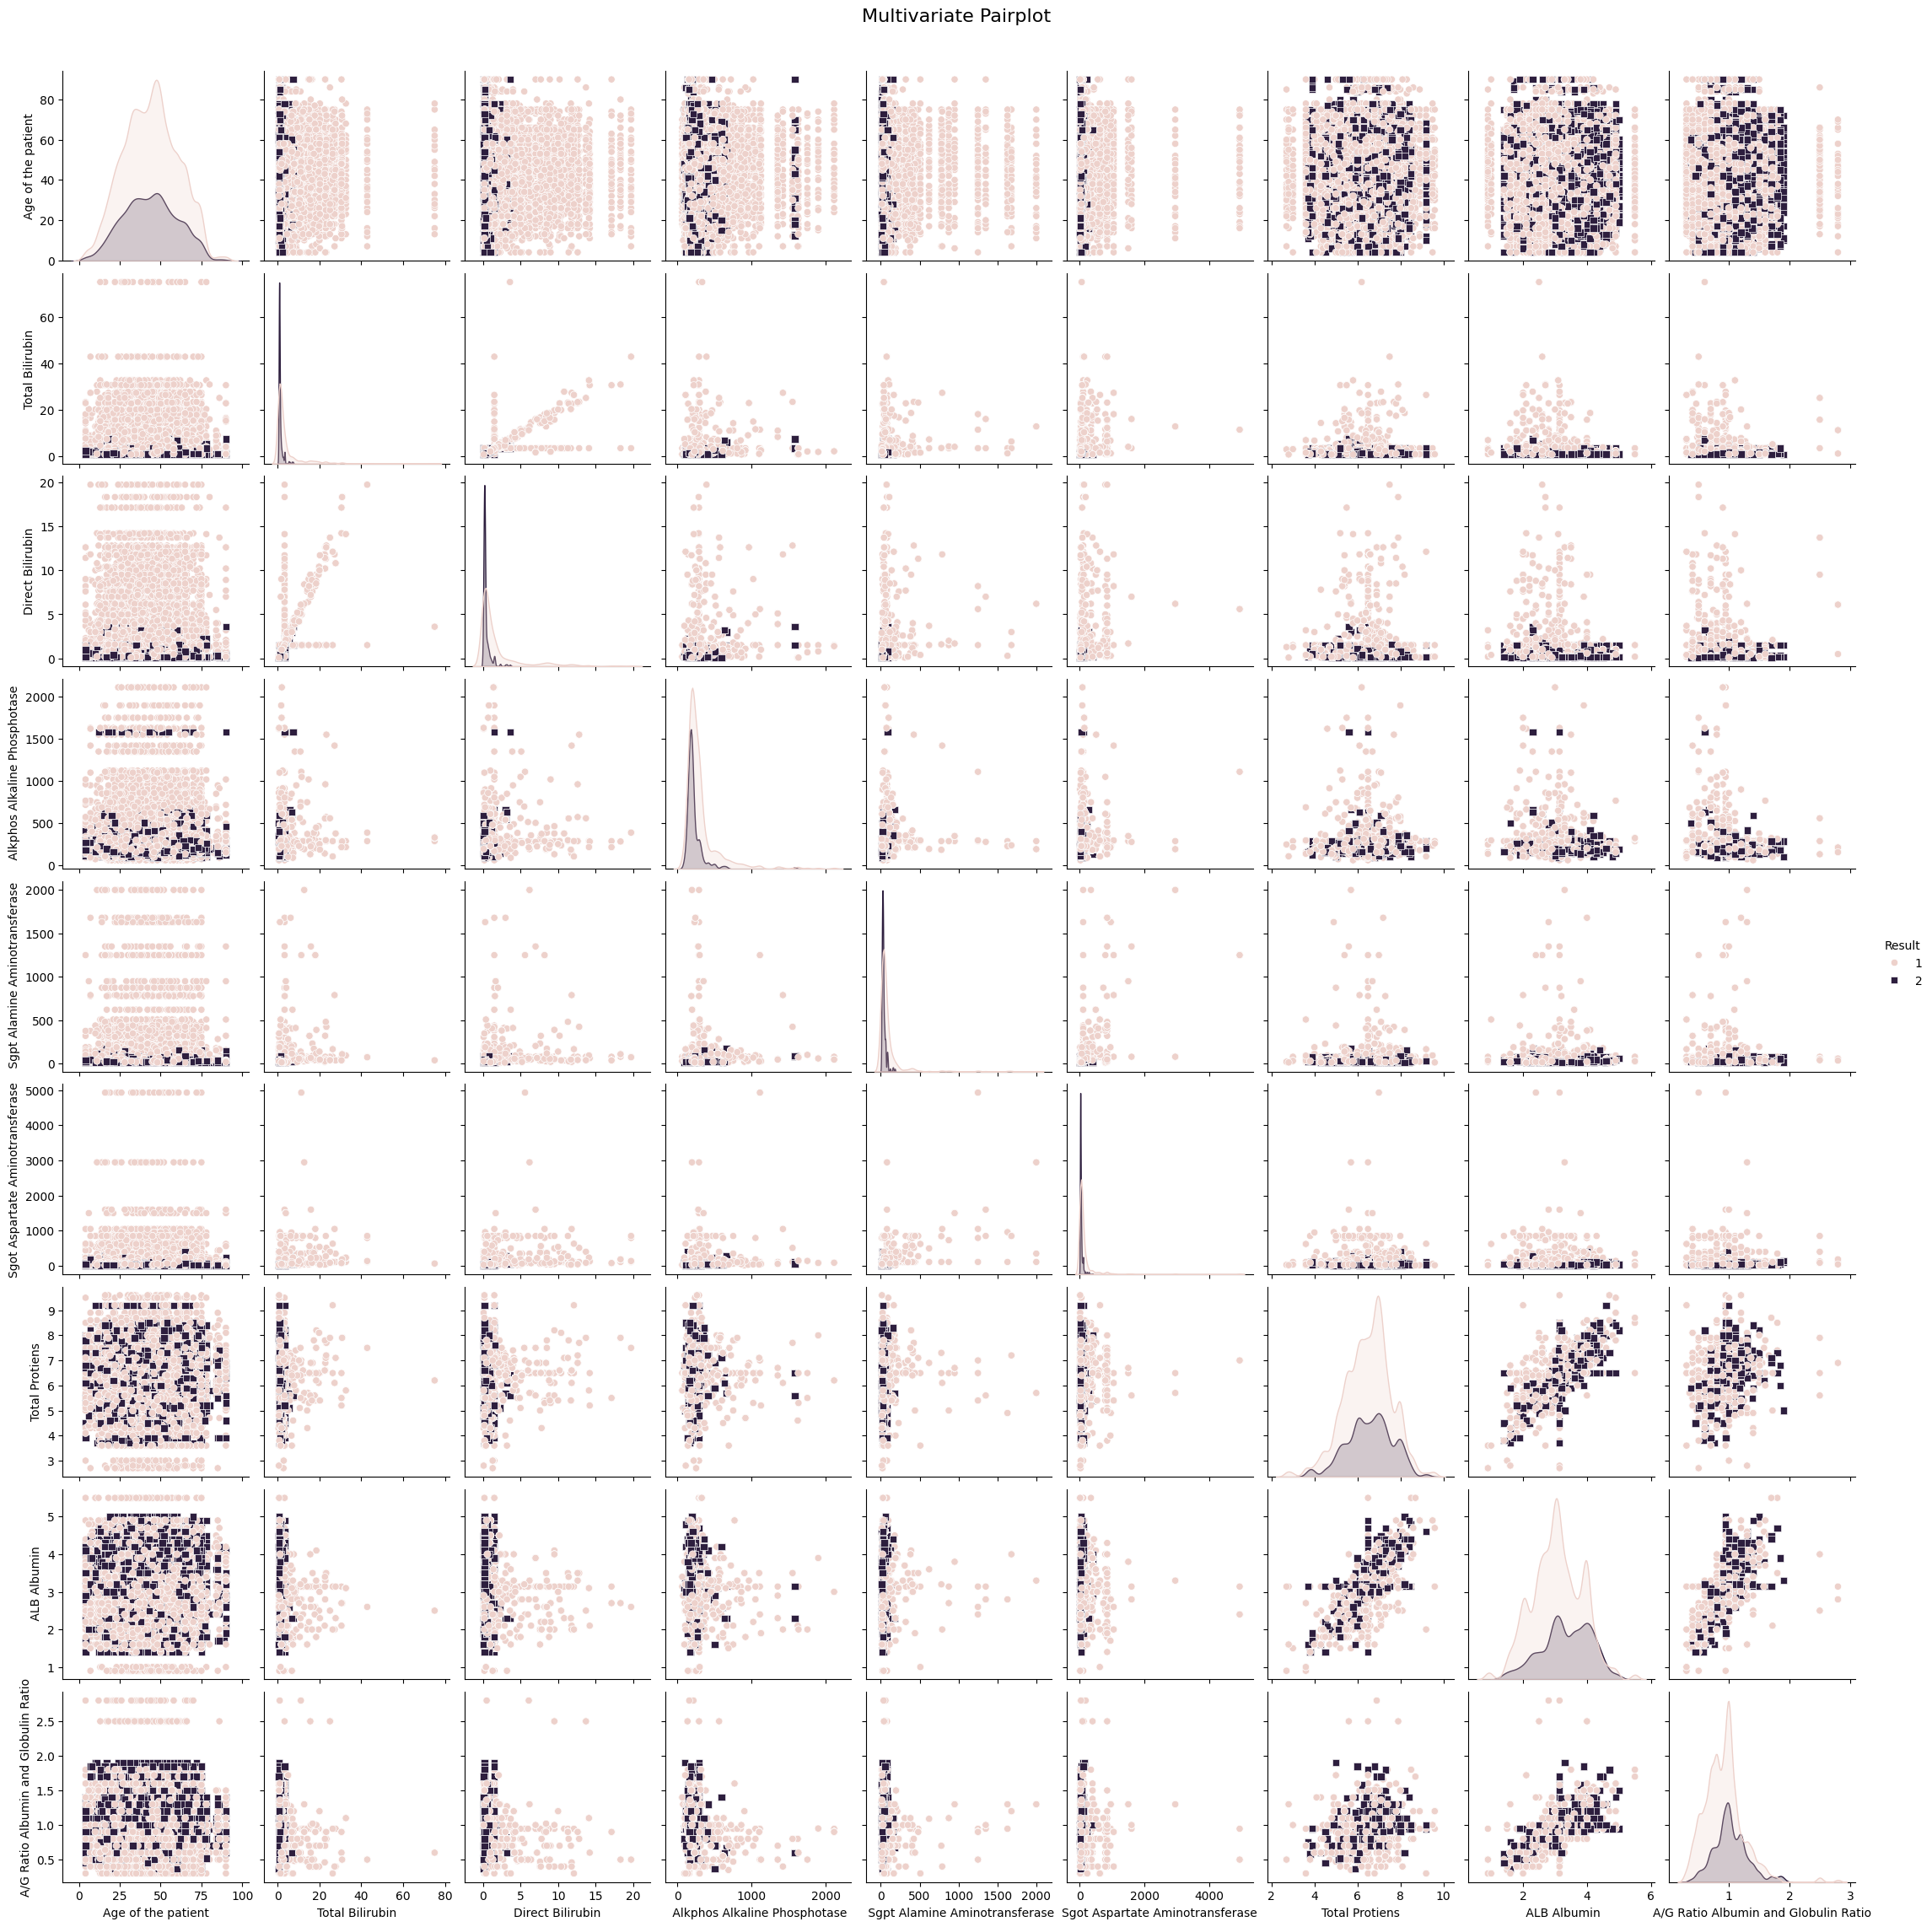

In [22]:
# 2. Advanced pairplot with hue based on the target variable
sns.pairplot(df, hue='Result', diag_kind='kde', markers=['o', 's'])
plt.suptitle("Multivariate Pairplot", y=1.02, fontsize=16)
plt.show()

In [25]:
if 'Result' in df.columns:
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    # Group by 'Result' and calculate mean for numeric columns only
    grouped = df.groupby('Result')[numeric_columns].mean()
    print("\nMean values grouped by Result:\n", grouped)
else:
    print("'Result' column not found in the DataFrame.")


Mean values grouped by Result:
         Age of the patient  Total Bilirubin  Direct Bilirubin  \
Result                                                          
1                43.843155         4.171743          1.957705   
2                43.727551         1.188382          0.416952   

         Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
Result                                                                  
1                          316.257522                       98.947247   
2                          222.675924                       34.996654   

        Sgot Aspartate Aminotransferase  Total Protiens   ALB Albumin  \
Result                                                                  
1                            138.320093        6.469096      3.059285   
2                             42.370870        6.557030      3.344244   

        A/G Ratio Albumin and Globulin Ratio  Result  
Result                                                
1         

In [27]:
# Discretization and Binning
# Binning Age into categories
df['Age Group'] = pd.cut(df['Age of the patient'], bins=[0, 30, 50, 70, 100], 
                         labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
print("\nBinned Age Groups:\n", df['Age Group'].value_counts())

# Binning Total Bilirubin
df['Bilirubin Level'] = pd.cut(df['Total Bilirubin'], bins=[0, 1, 5, 10, 20], 
                               labels=['Normal', 'Moderate', 'High', 'Very High'])
print("\nBinned Bilirubin Levels:\n", df['Bilirubin Level'].value_counts())


Binned Age Groups:
 Age Group
Middle-aged    8541
Senior         5444
Young          4351
Elderly        1032
Name: count, dtype: int64

Binned Bilirubin Levels:
 Bilirubin Level
Normal       9841
Moderate     6712
High         1163
Very High    1065
Name: count, dtype: int64


/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2985522799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age of the patient'], bins=[0, 30, 50, 70, 100],
/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2985522799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bilirubin Level'] = pd.cut(df['Total Bilirubin'], bins=[0, 1, 5, 10, 20],


In [28]:
# Advanced Missing Data Handling: Maximum Likelihood Estimation (MLE)
# Using Simple Imputer with Mean Estimation as a proxy for MLE
from sklearn.impute import SimpleImputer
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
print("\nMissing values handled using MLE proxy (mean imputation):\n", df.isnull().sum())


Missing values handled using MLE proxy (mean imputation):
 Age of the patient                        0
Gender of the patient                     0
Total Bilirubin                           0
Direct Bilirubin                          0
 Alkphos Alkaline Phosphotase             0
 Sgpt Alamine Aminotransferase            0
Sgot Aspartate Aminotransferase           0
Total Protiens                            0
 ALB Albumin                              0
A/G Ratio Albumin and Globulin Ratio      0
Result                                    0
Age Group                                 0
Bilirubin Level                         587
dtype: int64


/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2614193585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


In [29]:
# Advanced Correlation Analysis
from scipy.stats import spearmanr, pearsonr

# Spearman and Pearson Correlation for selected features
for col in numerical_cols:
    if col != 'Result':
        spearman_corr, _ = spearmanr(df['Result'], df[col])
        pearson_corr, _ = pearsonr(df['Result'], df[col])
        print(f"{col}: Spearman Correlation = {spearman_corr:.2f}, Pearson Correlation = {pearson_corr:.2f}")

# Time Series Analysis (if there is a date/time column)
if 'Date' in df.columns:  # Replace 'Date' with actual time-related column
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Visualizing Time Series Data
    df['Total Bilirubin'].plot(title='Time Series of Total Bilirubin')
    plt.show()

    # Resampling and Grouping
    monthly_avg = df['Total Bilirubin'].resample('M').mean()
    print("\nMonthly Average Bilirubin Levels:\n", monthly_avg)
    monthly_avg.plot(title='Monthly Average Bilirubin Levels')
    plt.show()

Age of the patient: Spearman Correlation = -0.00, Pearson Correlation = -0.00
Total Bilirubin: Spearman Correlation = -0.31, Pearson Correlation = -0.22
Direct Bilirubin: Spearman Correlation = -0.30, Pearson Correlation = -0.25
 Alkphos Alkaline Phosphotase: Spearman Correlation = -0.26, Pearson Correlation = -0.18
 Sgpt Alamine Aminotransferase: Spearman Correlation = -0.28, Pearson Correlation = -0.16
Sgot Aspartate Aminotransferase: Spearman Correlation = -0.31, Pearson Correlation = -0.16
Total Protiens: Spearman Correlation = 0.03, Pearson Correlation = 0.04
 ALB Albumin: Spearman Correlation = 0.17, Pearson Correlation = 0.16
A/G Ratio Albumin and Globulin Ratio: Spearman Correlation = 0.19, Pearson Correlation = 0.16


In [31]:
# Statistical Analysis
from scipy.stats import kurtosis, skew

# 1-D Statistical Analysis
for col in numerical_cols:
    print(f"{col}: Mean = {df[col].mean():.2f}, Variance = {df[col].var():.2f}, "
          f"Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")

Age of the patient: Mean = 43.81, Variance = 270.75, Skewness = 0.04, Kurtosis = -0.54
Total Bilirubin: Mean = 3.32, Variance = 36.28, Skewness = 4.60, Kurtosis = 32.62
Direct Bilirubin: Mean = 1.52, Variance = 7.99, Skewness = 3.22, Kurtosis = 11.39
 Alkphos Alkaline Phosphotase: Mean = 289.41, Variance = 55409.81, Skewness = 3.82, Kurtosis = 18.48
 Sgpt Alamine Aminotransferase: Mean = 80.60, Variance = 32032.16, Skewness = 6.65, Kurtosis = 52.07
Sgot Aspartate Aminotransferase: Mean = 110.79, Variance = 76222.04, Skewness = 10.44, Kurtosis = 152.80
Total Protiens: Mean = 6.49, Variance = 1.17, Skewness = -0.30, Kurtosis = 0.27
 ALB Albumin: Mean = 3.14, Variance = 0.62, Skewness = -0.05, Kurtosis = -0.32
A/G Ratio Albumin and Globulin Ratio: Mean = 0.95, Variance = 0.10, Skewness = 1.07, Kurtosis = 3.70
Result: Mean = 1.29, Variance = 0.20, Skewness = 0.94, Kurtosis = -1.11


In [32]:
# 2-D Statistical Analysis: Covariance
print("\nCovariance Matrix:\n", df[numerical_cols].cov())


Covariance Matrix:
                                       Age of the patient  Total Bilirubin  \
Age of the patient                            270.752659        -0.307967   
Total Bilirubin                                -0.307967        36.280392   
Direct Bilirubin                               -0.175686        15.083067   
 Alkphos Alkaline Phosphotase                   4.944264       279.880639   
 Sgpt Alamine Aminotransferase                 17.994613       221.913117   
Sgot Aspartate Aminotransferase                31.066728       406.942945   
Total Protiens                                 -0.168298        -0.001015   
 ALB Albumin                                   -0.134009        -1.039474   
A/G Ratio Albumin and Globulin Ratio           -0.049906        -0.375496   
Result                                         -0.023653        -0.610414   

                                      Direct Bilirubin  \
Age of the patient                           -0.175686   
Total Bilirubin

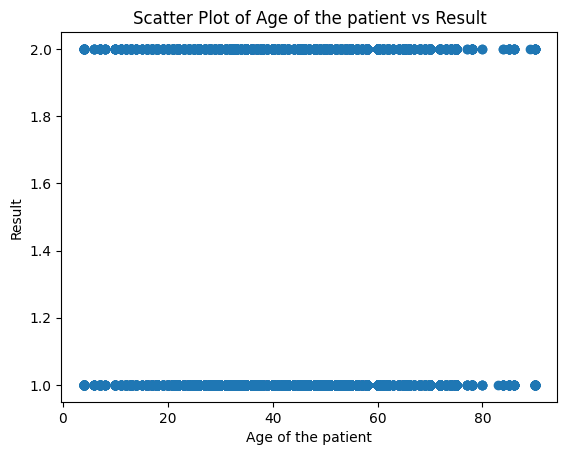

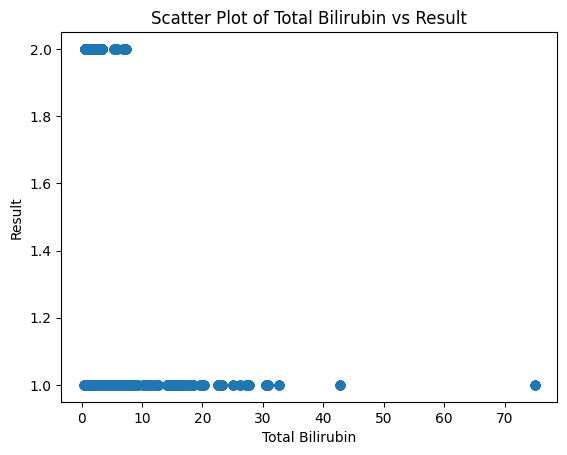

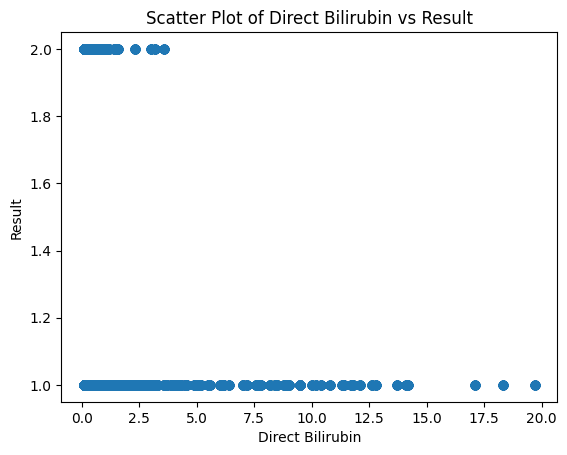

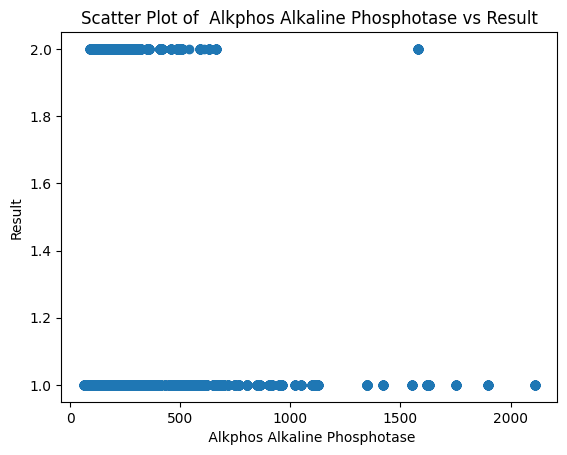

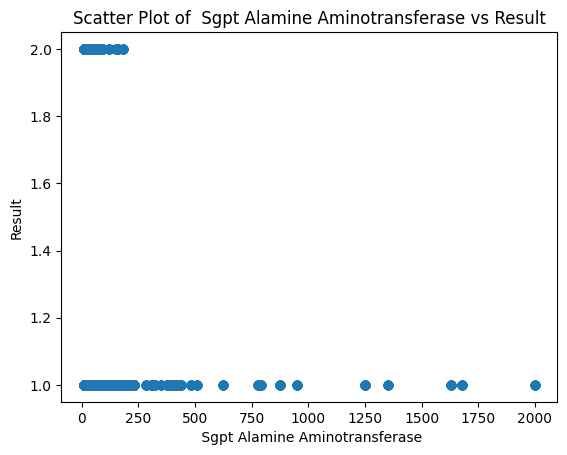

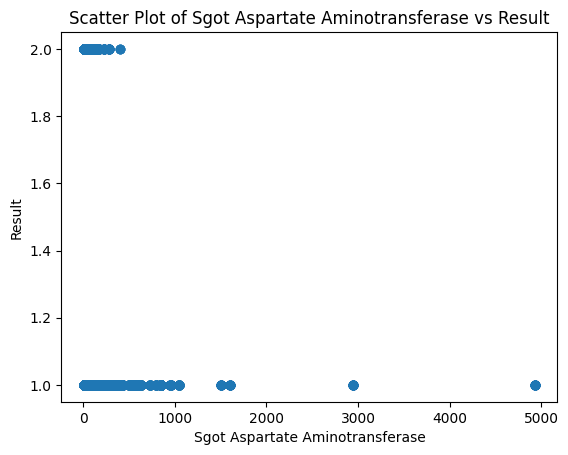

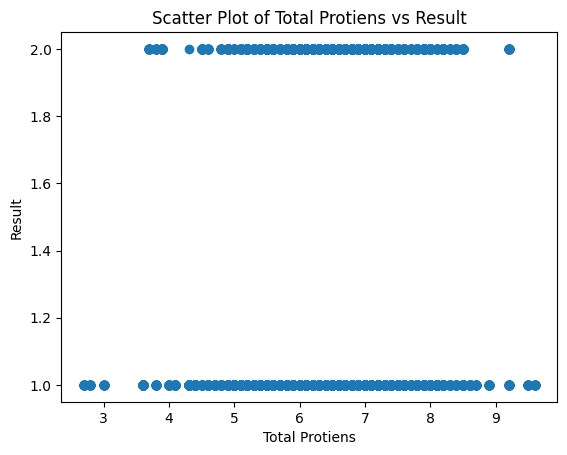

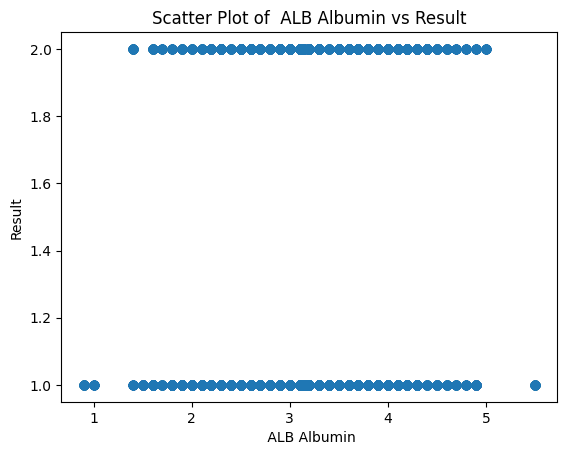

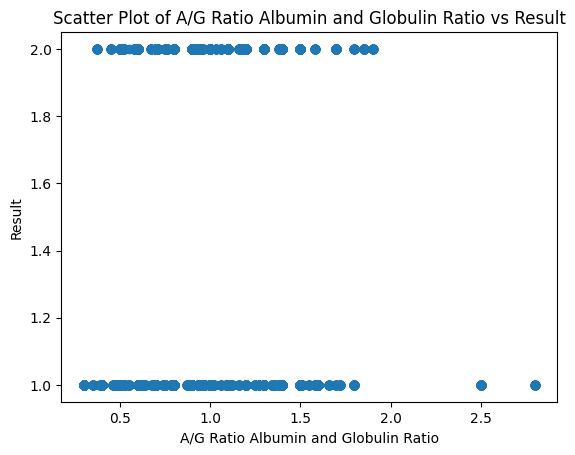

In [33]:
# Visualization: Scatter plots, Dot Charts, Bar Plots
for col in numerical_cols:
    if col != 'Result':
        plt.scatter(df[col], df['Result'])
        plt.title(f"Scatter Plot of {col} vs Result")
        plt.xlabel(col)
        plt.ylabel("Result")
        plt.show()

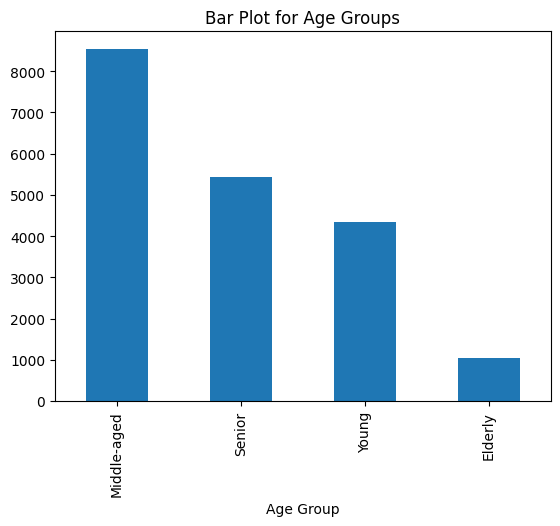

In [34]:
# Bar Plot
df['Age Group'].value_counts().plot(kind='bar', title='Bar Plot for Age Groups')
plt.show()

In [38]:
from sklearn.cluster import KMeans

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])
print("\nCluster Assignments:\n", df['Cluster'].value_counts())


Cluster Assignments:
 Cluster
0    17813
2     1120
1      435
Name: count, dtype: int64


/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/3793276184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df[numerical_cols])


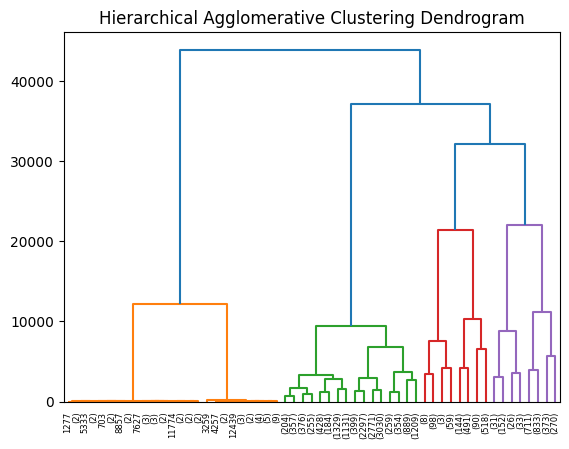

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Agglomerative Clustering
linkage_matrix = linkage(df[numerical_cols], method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Agglomerative Clustering Dendrogram")
plt.show()

/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2429913787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_result[:, 0]
/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/2429913787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA2'] = pca_result[:, 1]


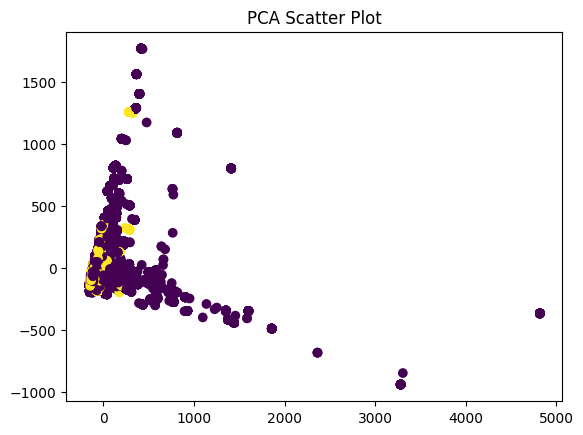

In [41]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_cols])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
plt.scatter(df['PCA1'], df['PCA2'], c=df['Result'])
plt.title("PCA Scatter Plot")
plt.show()

/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/867671533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-SNE1'] = tsne_result[:, 0]
/var/folders/v2/48vz5sy174l5n5nthk31gj6c0000gn/T/ipykernel_4141/867671533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-SNE2'] = tsne_result[:, 1]


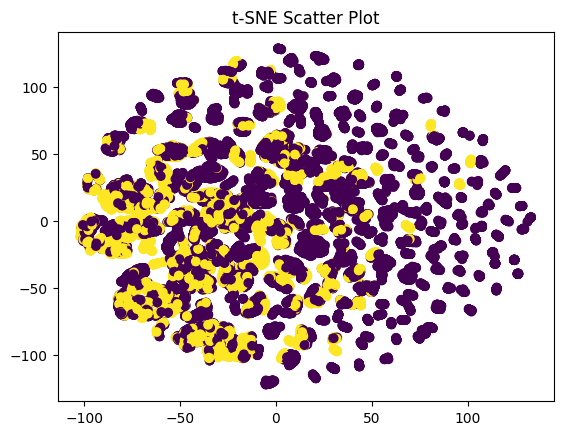

In [42]:
from sklearn.manifold import TSNE

# t-SNE (Non-linear dimensionality reduction)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df[numerical_cols])
df['t-SNE1'] = tsne_result[:, 0]
df['t-SNE2'] = tsne_result[:, 1]
plt.scatter(df['t-SNE1'], df['t-SNE2'], c=df['Result'])
plt.title("t-SNE Scatter Plot")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Preparing Data for Linear Regression
X = df[numerical_cols].drop('Result', axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.43
R² Score: 0.10
